<a href="https://colab.research.google.com/github/UmayrMooraja/AI_Final/blob/main/AI_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pycaret

     |████████████████████████████████| 288 kB 5.1 MB/s 
     |████████████████████████████████| 113 kB 38.1 MB/s 
     |████████████████████████████████| 2.0 MB 35.1 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 1.3 MB 71.0 MB/s 
     |████████████████████████████████| 6.8 MB 24.4 MB/s 
     |████████████████████████████████| 261 kB 54.4 MB/s 
     |████████████████████████████████| 1.7 MB 19.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.5 MB 26.5 MB/s 
     |████████████████████████████████| 167 kB 55.8 MB/s 
     |████████████████████████████████| 86 kB 6.0 MB/s 
     |████████████████████████████████| 675 kB 35.0 MB/s 
     |████████████████████████████████| 10.1 MB 69.8 MB/s 
     |████████████████████████████████| 62 kB 933 kB/s 
     |██████████████████

In [3]:
from pycaret.utils import enable_colab
import pandas as pd
enable_colab()

Colab mode enabled.


In [4]:
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data')
dataset.columns =['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
dataset

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
dataset.shape

(4176, 9)

In [6]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (3758, 9)
Unseen Data For Predictions: (418, 9)


In [7]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'sex', session_id=123) 

,Description,Value
0,session_id,123
1,Target,sex
2,Target Type,Multiclass
3,Label Encoded,"F: 0, I: 1, M: 2"
4,Original Data,"(3758, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.5532,0.7458,0.5521,0.5438,0.5441,0.3252,0.3280,1.134
lr,Logistic Regression,0.5502,0.7528,0.5453,0.5410,0.5274,0.3174,0.3270,0.464
ridge,Ridge Classifier,0.5468,0.0000,0.5441,0.5323,0.5205,0.3149,0.3248,0.016
lda,Linear Discriminant Analysis,0.5460,0.7446,0.5436,0.5393,0.5334,0.3125,0.3176,0.021
et,Extra Trees Classifier,0.5445,0.7398,0.5461,0.5380,0.5397,0.3142,0.3151,0.574
ada,Ada Boost Classifier,0.5430,0.7262,0.5375,0.5288,0.5209,0.3067,0.3157,0.166
rf,Random Forest Classifier,0.5426,0.7425,0.5435,0.5369,0.5382,0.3107,0.3117,0.703
lightgbm,Light Gradient Boosting Machine,0.5399,0.7326,0.5420,0.5351,0.5364,0.3075,0.3081,0.270
svm,SVM - Linear Kernel,0.5316,0.0000,0.5200,0.4382,0.4410,0.2838,0.3454,0.064
qda,Quadratic Discriminant Analysis,0.5243,0.7319,0.5377,0.5114,0.4958,0.2937,0.3060,0.018


In [9]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5361,0.6507,0.5352,0.5357,0.5359,0.3019,0.3019
1,0.4981,0.6219,0.5004,0.4932,0.4953,0.2460,0.2462
2,0.5361,0.6508,0.5406,0.5340,0.5344,0.3041,0.3045
3,0.4411,0.5761,0.4408,0.4495,0.4439,0.1560,0.1564
4,0.5285,0.6449,0.5300,0.5246,0.5261,0.2914,0.2917
5,0.5133,0.6319,0.5158,0.5183,0.5156,0.2675,0.2676
6,0.5095,0.6308,0.5116,0.5058,0.5071,0.2634,0.2636
7,0.4563,0.5897,0.4602,0.4646,0.4596,0.1831,0.1834
8,0.5095,0.6306,0.5123,0.5120,0.5104,0.2634,0.2637
9,0.5285,0.6449,0.5310,0.5297,0.5289,0.2919,0.2920


In [10]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [11]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5209,0.7009,0.5244,0.5179,0.5179,0.2818,0.2826
1,0.5057,0.7054,0.5142,0.4927,0.4958,0.2608,0.2626
2,0.5323,0.7448,0.5381,0.5203,0.5230,0.2996,0.3014
3,0.4411,0.6369,0.4476,0.4422,0.4389,0.1645,0.1658
4,0.4791,0.6568,0.4871,0.4654,0.4673,0.2219,0.2241
5,0.4753,0.6706,0.4776,0.4730,0.4739,0.2096,0.2097
6,0.5437,0.7107,0.5518,0.5443,0.5364,0.3196,0.3240
7,0.4829,0.6903,0.4896,0.4868,0.4834,0.2254,0.2263
8,0.5095,0.7091,0.5102,0.5090,0.5089,0.2636,0.2639
9,0.4981,0.7077,0.5033,0.4848,0.4898,0.2476,0.2484


In [12]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4981,0.7049,0.4938,0.4774,0.4726,0.2385,0.2455
1,0.5741,0.7643,0.5691,0.5497,0.5472,0.3548,0.3641
2,0.5323,0.7581,0.5271,0.5158,0.4956,0.2900,0.3041
3,0.4905,0.7297,0.4867,0.4873,0.4766,0.2264,0.2321
4,0.5437,0.7390,0.5379,0.5479,0.5190,0.3067,0.3193
5,0.5437,0.7454,0.5386,0.5493,0.5231,0.3072,0.3182
6,0.5589,0.7569,0.5551,0.5505,0.5371,0.3323,0.3416
7,0.5894,0.7695,0.5859,0.5777,0.5692,0.3774,0.3864
8,0.5856,0.7799,0.5786,0.5714,0.5653,0.3709,0.3793
9,0.5856,0.7799,0.5802,0.5830,0.5685,0.3699,0.3797


In [13]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5323,0.6717,0.5119,0.3747,0.4376,0.2785,0.3209
1,0.5741,0.7080,0.5556,0.4039,0.4714,0.3452,0.3996
2,0.5285,0.6860,0.5133,0.3702,0.4340,0.2761,0.3174
3,0.5019,0.6508,0.4829,0.3606,0.4127,0.2312,0.2746
4,0.5285,0.6813,0.5106,0.3787,0.4360,0.2734,0.3210
5,0.5285,0.6777,0.5101,0.3787,0.4356,0.2731,0.3214
6,0.5323,0.6773,0.5157,0.3720,0.4363,0.2817,0.3243
7,0.5437,0.7070,0.5302,0.3778,0.4454,0.3008,0.3436
8,0.5779,0.7116,0.5558,0.4119,0.4770,0.3490,0.4051
9,0.5627,0.7171,0.5416,0.4114,0.4685,0.3243,0.3817


In [14]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [15]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5513,0.7233,0.5472,0.5418,0.5444,0.3220,0.3234
1,0.5513,0.7343,0.5512,0.5318,0.5360,0.3236,0.3269
2,0.4981,0.7465,0.4972,0.4790,0.4795,0.2407,0.2451
3,0.5247,0.7250,0.5263,0.5188,0.5208,0.2841,0.2846
4,0.4677,0.7030,0.4699,0.4503,0.4557,0.1972,0.1985
5,0.4867,0.7008,0.4852,0.4845,0.4785,0.2220,0.2254
6,0.5209,0.7365,0.5242,0.5103,0.5133,0.2816,0.2828
7,0.5513,0.7460,0.5494,0.5373,0.5381,0.3208,0.3249
8,0.5513,0.7596,0.5517,0.5364,0.5421,0.3251,0.3261
9,0.5627,0.7649,0.5617,0.5485,0.5521,0.3393,0.3415


In [16]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5171,0.7091,0.5156,0.4991,0.4981,0.2695,0.2745
1,0.5932,0.7674,0.5893,0.5714,0.5687,0.3846,0.3932
2,0.5209,0.7634,0.5180,0.4975,0.4873,0.2743,0.2852
3,0.4905,0.7340,0.4896,0.4778,0.4782,0.2298,0.2326
4,0.5665,0.7465,0.5626,0.5614,0.5458,0.3436,0.3532
5,0.5361,0.7498,0.5341,0.5289,0.5178,0.2985,0.3057
6,0.5817,0.7618,0.5810,0.5696,0.5634,0.3694,0.3767
7,0.5779,0.7707,0.5775,0.5638,0.5615,0.3621,0.3677
8,0.6008,0.7801,0.5989,0.5868,0.5898,0.3981,0.4006
9,0.5894,0.7806,0.5882,0.5813,0.5776,0.3786,0.3833


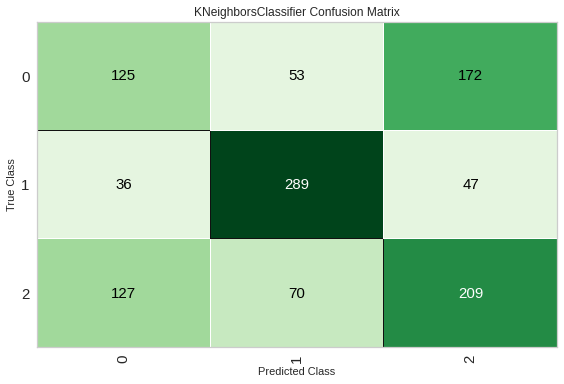

In [17]:
plot_model(tuned_knn, plot = 'confusion_matrix')

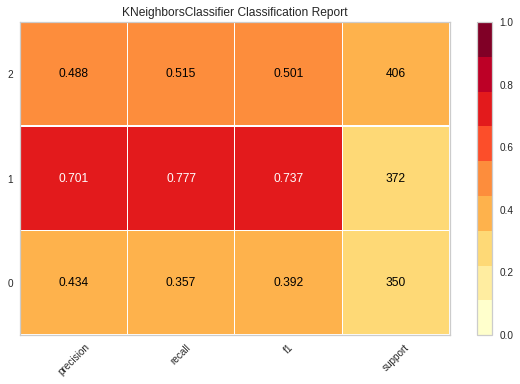

In [18]:
plot_model(tuned_knn, plot = 'class_report')

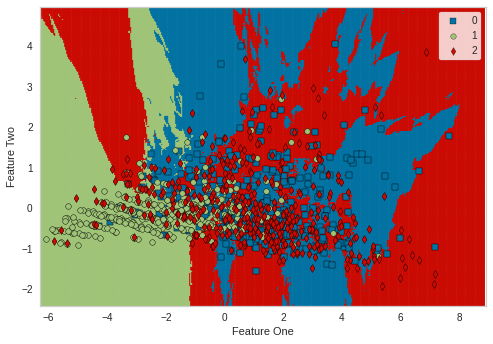

In [19]:
plot_model(tuned_knn, plot='boundary')

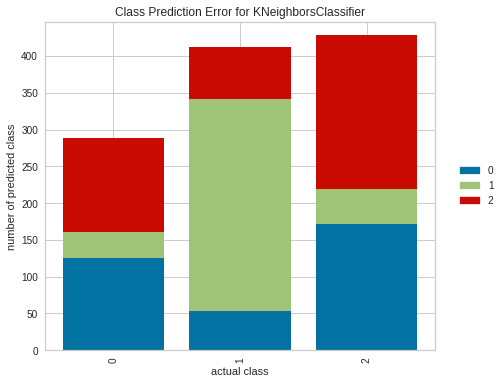

In [20]:
plot_model(tuned_knn, plot = 'error')

In [21]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [22]:
predict_model(tuned_knn);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.5523,0.7536,0.5496,0.5418,0.5451,0.3255,0.3267


In [23]:
final_knn = finalize_model(tuned_knn)
print(final_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=33, p=2,
                     weights='uniform')


In [24]:
unseen_predictions = predict_model(final_knn, data=data_unseen)
unseen_predictions.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,Label,Score
0,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,M,0.5152
1,M,0.490,0.380,0.135,0.5415,0.2175,0.0950,0.190,11,F,0.3636
2,F,0.470,0.355,0.100,0.4755,0.1675,0.0805,0.185,10,M,0.4848
3,M,0.450,0.320,0.100,0.3810,0.1705,0.0750,0.115,9,I,0.4545
4,F,0.615,0.480,0.165,1.1615,0.5130,0.3010,0.305,10,M,0.5455


In [25]:
save_model(final_knn,'Final KNN Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='sex',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                 ('fix_perfect', Remove_100(target='sex')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
            

In [26]:
saved_final_knn = load_model('Final KNN Model')

Transformation Pipeline and Model Successfully Loaded


In [27]:
new_prediction = predict_model(saved_final_knn, data=data_unseen)
new_prediction.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,Label,Score
0,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,M,0.5152
1,M,0.490,0.380,0.135,0.5415,0.2175,0.0950,0.190,11,F,0.3636
2,F,0.470,0.355,0.100,0.4755,0.1675,0.0805,0.185,10,M,0.4848
3,M,0.450,0.320,0.100,0.3810,0.1705,0.0750,0.115,9,I,0.4545
4,F,0.615,0.480,0.165,1.1615,0.5130,0.3010,0.305,10,M,0.5455
